In [159]:
import pandas as pd
import numpy as np
from urllib.parse import unquote

In [176]:
df = pd.read_csv("search_alignment.csv",sep=";")

def safeUnquote(x):
    try:
        return unquote(x)
    except Exception as e:
        print(x,e)
        return ""

df['q_enc'] = df['query'].map(lambda x:safeUnquote(x))
df

,mark,query,url,q_enc
0,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив
1,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/0c/07/b0ae9...,как правильно писать разлив или розлив
2,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bc/6e/fd377...,как правильно писать разлив или розлив
3,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив
4,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bb/30/69e3c...,как правильно писать разлив или розлив
...,...,...,...,...
2606,+,%D1%81%D0%BE%D0%B2%D1%83%D1%88%D0%BA%D0%B8,https://cdn-st.rutubelist.ru/media/1a/01/6734c...,совушки
2607,-,%D1%81%D0%BE%D0%B2%D1%83%D1%88%D0%BA%D0%B8,https://cdn-st.rutubelist.ru/media/af/07/6b844...,совушки
2608,-,%D1%81%D0%BE%D0%B2%D1%83%D1%88%D0%BA%D0%B8,https://cdn-st.rutubelist.ru/media/f6/dc/4b764...,совушки
2609,+,%D0%BF%D0%BE%D0%BF%D1%83%D0%B3%D0%B0%D0%B9,https://cdn-st.rutubelist.ru/media/c3/df/c6a38...,попугай


In [3]:
df[df['q_enc']=='']

,mark,query,url,q_enc


In [161]:
import requests,json

text2vec_cache = {}

def text2vec(text):
    global text2vec_cache
    if text in text2vec_cache:
        return text2vec_cache[text]
    res = requests.get("http://127.0.0.1:6000/clip_text_encode",params=[("text",text)])
    res = json.loads(res.text)
    text2vec_cache[text] = np.array(res["embedding"])
    return text2vec_cache[text]

doc2vec_cache = {}

def doc2vec(text):
    global doc2vec_cache
    if text in doc2vec_cache:
        return doc2vec_cache[text]
    res = requests.get("http://127.0.0.1:6000/doc2vec",params=[("text",text)])
    res = json.loads(res.text)
    res["embedding"] = np.array(res["embedding"])
    doc2vec_cache[text] = res
    return doc2vec_cache[text]

In [177]:
df['clip_enc'] = df['q_enc'].map(lambda x:text2vec(x.replace("#","")))
df.head()

,mark,query,url,q_enc,clip_enc
0,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."
1,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/0c/07/b0ae9...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."
2,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bc/6e/fd377...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."
3,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."
4,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bb/30/69e3c...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."


In [178]:
%%time
df['doc_enc'] = df['q_enc'].map(lambda x:doc2vec(x.replace("#","")))
df.head()

CPU times: user 43.9 ms, sys: 4.05 ms, total: 48 ms
Wall time: 478 ms


,mark,query,url,q_enc,clip_enc,doc_enc
0,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."
1,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/0c/07/b0ae9...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."
2,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bc/6e/fd377...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."
3,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."
4,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bb/30/69e3c...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."


In [6]:
df['q_enc'][0]

'как правильно писать разлив или розлив'

In [163]:
import pickle

with open("dict_store_new.pkl","rb") as fl:
    indexedVideos = pickle.load(fl)

print(len(indexedVideos))

10421


In [164]:
len(indexedVideos)/400000 * 100

2.60525

In [165]:
def preprocessVideoForQuery(url,query):
    # 1) Find url
    iVideo = None
    for o in indexedVideos:
        if o['url']!=url:continue
        iVideo = o
        break
    if iVideo is None:
        print(url,"has not indexed yet")
        return
    # 2) Preprocess query
    clip_emb = text2vec(query.replace("#",""))
    doc_enc = doc2vec(query)
    doc_emb = doc_enc['embedding']
    doc_lemmed = set(doc_enc['lemmed'] if 'lemmed' in doc_enc else [])
    doc_words = set(query.replace(",","").lower().split(" "))
    # 3) Feature extracting
    features = []
    clip_innerprod = iVideo['clip_embeddings'].dot(clip_emb)
    features.append(clip_innerprod.min())
    features.append(clip_innerprod.mean())
    features.append(clip_innerprod.max())
    features.append(clip_innerprod.std())
    doc_innerprod = iVideo['description_embedding'].dot(doc_emb)
    features.append(doc_innerprod)
    doc_innerprod2 = iVideo['transcription_embedding'].dot(doc_emb)
    features.append(doc_innerprod2)
    features.append(max(features))
    # 3.2) Words calculating
    description_words = set(iVideo['description'].lower().split(" "))
    description_words_comp = len(description_words & doc_words) / max(len(doc_words),1)
    features.append(description_words_comp)
    transcription_words = set(iVideo['transcription'].split(" "))
    transcription_words_comp = len(transcription_words & doc_words) / max(len(doc_words),1)
    features.append(transcription_words_comp)
    transcription_words2 = set(iVideo['transcription_lemmed'])
    transcription_words_comp2 = len(transcription_words2 & doc_lemmed) / max(len(doc_lemmed),1)
    features.append(transcription_words_comp2)
    features.append(max(features))
    return features

In [166]:
%%time
preprocessVideoForQuery('https://cdn-st.rutubelist.ru/media/ee/80/29098d1e4b93ad7f025cbe1b7fe7/fhd.mp4',
                        'как резать стекло под водой')

CPU times: user 5.91 ms, sys: 82 µs, total: 5.99 ms
Wall time: 52.1 ms


[0.2172265966395708,
 0.29435148639561737,
 0.3811079639044104,
 0.054979991143736036,
 0.5510368442600055,
 0.6062659757908622,
 0.6062659757908622,
 0.2,
 0.8,
 0.8,
 0.8]

In [179]:
%%time
y_goal = []

for url,query in zip(df['url'],df['q_enc']):
    y_goal.append(preprocessVideoForQuery(url,query))

CPU times: user 1.12 s, sys: 3.17 ms, total: 1.12 s
Wall time: 1.12 s


In [180]:
len(y_goal)

2611

In [181]:
df['sign'] = df['mark'].map(lambda x:int(x=='-')-int(x=='+'))
df.head()

,mark,query,url,q_enc,clip_enc,doc_enc,sign
0,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",-1
1,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/0c/07/b0ae9...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",1
2,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bc/6e/fd377...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",1
3,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",-1
4,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bb/30/69e3c...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",1


In [182]:
doc_enc_all = np.zeros((len(df),768))

for i,enc in enumerate(df['doc_enc']):
    doc_enc_all[i] = enc['embedding']

doc_enc_all

array([[-0.00644803,  0.02024133, -0.04367693, ..., -0.03022208,
        -0.03108507,  0.01216101],
       [-0.00644803,  0.02024133, -0.04367693, ..., -0.03022208,
        -0.03108507,  0.01216101],
       [-0.00644803,  0.02024133, -0.04367693, ..., -0.03022208,
        -0.03108507,  0.01216101],
       ...,
       [-0.01661295, -0.01339296,  0.00359414, ...,  0.00339168,
        -0.01771467, -0.03118717],
       [-0.0081185 ,  0.01650092,  0.02428489, ...,  0.03120786,
        -0.00725997, -0.0343472 ],
       [-0.0081185 ,  0.01650092,  0.02428489, ...,  0.03120786,
        -0.00725997, -0.0343472 ]])

In [204]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(doc_enc_all)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
import torch
import torch.nn as nn

In [205]:
Tdoc_enc_all = torch.Tensor(pca.transform(doc_enc_all))
Ty_goal = torch.Tensor(y_goal)
Tsign = torch.Tensor(df['sign'])

In [206]:
Tdoc_enc_all.shape,Ty_goal.shape,Tsign.shape

(torch.Size([2611, 5]), torch.Size([2611, 11]), torch.Size([2611]))

In [207]:
model = nn.Sequential(
    nn.Linear(Tdoc_enc_all.shape[1],Ty_goal.shape[1]),
    nn.Dropout(p=0.2),
    nn.Sigmoid() # -> (0,1) important!
)

opt = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-3)

In [98]:
def calcAccuracy(weighted_sum,Tsign):
    queries = list(set(df['q_enc']))
    np_ws = weighted_sum.detach().numpy().sum(axis=1)
    np_signs = Tsign.numpy()
    all_signs = 0
    correct_signs = 0
    for q in queries[2:]:
        inds = (df['q_enc']==q).to_numpy()
        np_ws_q = np_ws[inds]
        np_signs_q = np_signs[inds]
        stack = np.vstack((np_ws_q,np_signs_q)).T
        stack = stack[stack[:, 0].argsort()]
        plus_count = (stack[:,1]>0).sum()
        minus_count = (stack[:,1]<0).sum()
        correct_pluses = sum(stack[:plus_count,1]>0)
        correct_minuses = sum(stack[-minus_count:,1]<0)
        all_signs += plus_count+minus_count
        correct_signs += correct_pluses+correct_minuses
        # print(q,correct_pluses+correct_minuses,plus_count+minus_count)
    return correct_signs/all_signs

#calcAccuracy(weighted_sum,Tsign)

0.7283667621776504

In [208]:
history = []

for epoch in range(10001):
    opt.zero_grad()
    m_coefs = model(Tdoc_enc_all)
    m_coefs = nn.functional.normalize(m_coefs, p=1)
    weighted_sum = m_coefs*Ty_goal
    weighted_sum.shape
    loss = (weighted_sum.sum(axis=1)*Tsign).sum()
    loss.backward()
    opt.step()
    if(epoch%2000==0):
        print(epoch,"Loss:",loss.item(),"Acc:",calcAccuracy(weighted_sum,Tsign) )
    history.append(loss.item())

0 Loss: -12.01698112487793 Acc: 0.6304849884526559
2000 Loss: -63.401573181152344 Acc: 0.7120862201693611
4000 Loss: -75.6671371459961 Acc: 0.7190146266358738
6000 Loss: -77.36099243164062 Acc: 0.7151655119322555
8000 Loss: -81.32086181640625 Acc: 0.7328714395688991
10000 Loss: -86.56305694580078 Acc: 0.7190146266358738


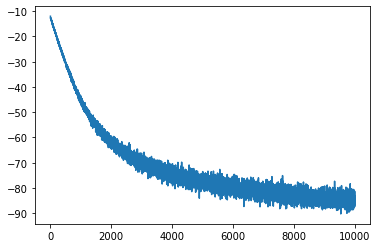

In [209]:
import matplotlib.pyplot as plt

plt.plot(history)

In [131]:
def getCoefsByPrompt(query):
    if type(query)==str:
        query = doc2vec(query)['embedding']
    model.eval()
    enc = pca.transform(query.reshape(1,-1))
    with torch.no_grad():
        enc = torch.Tensor(enc)
        coefs = model(enc)
        return coefs.numpy()[0]

In [151]:
def keyMatching(arr):
    features = []
    features.append("clip_innerprod.min()   ")
    features.append("clip_innerprod.mean()  ")
    features.append("clip_innerprod.max()   ")
    features.append("clip_innerprod.std()   ")
    features.append("descr_innerprod        ")
    features.append("trans_innerprod        ")
    features.append("max(features)          ")
    # 3.2) Words calculating
    features.append("descr_words_comp       ")
    features.append("trans_words_comp       ")
    features.append("trans_lemmed_words_comp")
    features.append("max(features)          ")
    norm = max(arr)
    for k,v in zip(features,arr):
        print(k,round(v,5),'*'*round(v/norm*50),sep='\t')

In [189]:
keyMatching(getCoefsByPrompt("котики"))

clip_innerprod.min()   	0.84569	******************************************
clip_innerprod.mean()  	0.96045	************************************************
clip_innerprod.max()   	0.99893	**************************************************
clip_innerprod.std()   	0.01174	*
descr_innerprod        	0.01594	*
trans_innerprod        	0.00384	
max(features)          	0.11612	******
descr_words_comp       	0.00036	
trans_words_comp       	0.02986	*
trans_lemmed_words_comp	0.03626	**
max(features)          	0.04905	**


In [190]:
keyMatching(getCoefsByPrompt("геншин импакт"))

clip_innerprod.min()   	0.00028	
clip_innerprod.mean()  	0.04101	**
clip_innerprod.max()   	0.8878	********************************************
clip_innerprod.std()   	0.0002	
descr_innerprod        	0.03163	**
trans_innerprod        	0.0051	
max(features)          	0.00646	
descr_words_comp       	0.01556	*
trans_words_comp       	0.84947	*******************************************
trans_lemmed_words_comp	0.92528	**********************************************
max(features)          	0.9991	**************************************************


In [191]:
keyMatching(getCoefsByPrompt("как правильно розлив или разлив"))

clip_innerprod.min()   	0.78135	***************************************
clip_innerprod.mean()  	0.04142	**
clip_innerprod.max()   	0.00481	
clip_innerprod.std()   	0.98814	**************************************************
descr_innerprod        	1e-05	
trans_innerprod        	0.00536	
max(features)          	0.00034	
descr_words_comp       	0.99329	**************************************************
trans_words_comp       	0.01877	*
trans_lemmed_words_comp	0.07243	****
max(features)          	0.01805	*


In [258]:
mu = np.mean(doc_enc_all, axis=0)
pca_M = pca.components_.T
pca_M.shape,mu.shape

((768, 4), (768,))

In [259]:
(doc_enc_all-mu).dot(pca_M)

array([[-0.35536303,  0.13516976, -0.2220154 ,  0.11829696],
       [-0.35536303,  0.13516976, -0.2220154 ,  0.11829696],
       [-0.35536303,  0.13516976, -0.2220154 ,  0.11829696],
       ...,
       [-0.16711572, -0.06676016,  0.20230792,  0.12821883],
       [-0.16711572, -0.06676016,  0.20230792,  0.12821883],
       [-0.16711572, -0.06676016,  0.20230792,  0.12821883]])

In [261]:
with torch.no_grad():
    coefs=model(Tdoc_enc_all)
coefs

tensor([[0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        [0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        [0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        ...,
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901],
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901],
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901]])

In [262]:
tmp = torch.Tensor((doc_enc_all-mu).dot(pca_M))

with torch.no_grad():
    coefs=model(Tdoc_enc_all)
coefs

tensor([[0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        [0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        [0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        ...,
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901],
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901],
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901]])

In [212]:
model_M = model[0].weight.detach().numpy().T
model_bias = model[0].bias.detach().numpy()

In [217]:
keyMatching(abs(model_M).min(axis=0))

clip_innerprod.min()   	1.87253	********************************
clip_innerprod.mean()  	1.47721	*************************
clip_innerprod.max()   	0.37389	******
clip_innerprod.std()   	2.94255	**************************************************
descr_innerprod        	0.06637	*
trans_innerprod        	0.17866	***
max(features)          	2.06948	***********************************
descr_words_comp       	0.08834	**
trans_words_comp       	2.19153	*************************************
trans_lemmed_words_comp	1.01162	*****************
max(features)          	0.60602	**********


In [218]:
keyMatching(abs(model_bias))

clip_innerprod.min()   	0.76848	*******
clip_innerprod.mean()  	2.10393	*******************
clip_innerprod.max()   	3.34938	******************************
clip_innerprod.std()   	4.3458	**************************************
descr_innerprod        	5.67159	**************************************************
trans_innerprod        	5.21857	**********************************************
max(features)          	1.89866	*****************
descr_words_comp       	4.15871	*************************************
trans_words_comp       	4.21986	*************************************
trans_lemmed_words_comp	3.94763	***********************************
max(features)          	2.01809	******************


In [211]:
mu = np.mean(doc_enc_all, axis=0)
pca_M = pca.components_.T
np.savetxt("pca_M_doc.dat",pca_M)
np.savetxt("pca_mu_doc.dat",mu)
torch.save(model.state_dict(), 'sorter_model_doc.pt')

In [201]:
def getCoefsByPrompt2(query):
    if type(query)==str:
        query = doc2vec(query)['embedding']
    model.eval()
    enc = (query.reshape(1,-1)-mu).dot(pca_M)
    with torch.no_grad():
        enc = torch.Tensor(enc)
        coefs = model(enc)
        return coefs.numpy()

In [205]:
np.array(y_goal).dot(getCoefsByPrompt("котики")[0])

array([0.77780327, 0.9283202 , 0.80451702, 0.77780327, 0.74828601,
       0.10407396, 0.25520212, 0.0794793 , 0.30081886, 0.08738758,
       0.27968014, 0.27163592, 0.26963775, 0.18371564, 0.35529533,
       0.66629343, 0.33412409, 0.54452943, 0.29326892, 0.44877496,
       0.11596184, 0.8811167 , 0.52860373, 0.30975817, 0.45003739,
       1.24092837, 0.68761115, 0.83067366, 0.61763885, 0.8760674 ,
       0.38183149, 0.42232442, 0.33342094, 0.50428677, 0.08041946,
       0.07552595, 0.16221854, 0.32680722, 0.37595989, 0.29154928,
       0.08215082, 0.24997351, 0.60100443, 1.06365715, 0.63657507,
       0.29549721, 0.12016483, 0.2349798 , 0.23934745, 0.10583497,
       0.33248856, 0.10159993, 0.08452804, 0.99207541, 1.28296793,
       0.69213864, 1.43904787, 0.78367172, 1.0098728 , 0.81381062,
       1.1242044 , 0.82152751, 0.81252528, 1.46424221, 0.18629866,
       0.10490976, 0.64495061, 0.10505264, 0.65109962, 0.09479678,
       1.26839489, 0.27776538, 0.34831648, 0.35561542, 0.09613

In [206]:
Tdoc_enc_all.shape[1],Ty_goal.shape[1]

(30, 11)